In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('healthcare.csv')

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
data_description = pd.read_csv('train_data_dictionary.csv')

In [5]:
data_description

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [6]:
df.shape

(318438, 18)

In [7]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [8]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
len(df['patientid'].unique()) # number of patients

92017

In [10]:
len(df['Hospital_code'].unique()) # number of hospitals

32

In [11]:
df['Bed Grade'].fillna(df['Bed Grade'].mode()[0],inplace = True)

In [12]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0],inplace = True)

In [13]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [14]:
df['Stay'].value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

<AxesSubplot:>

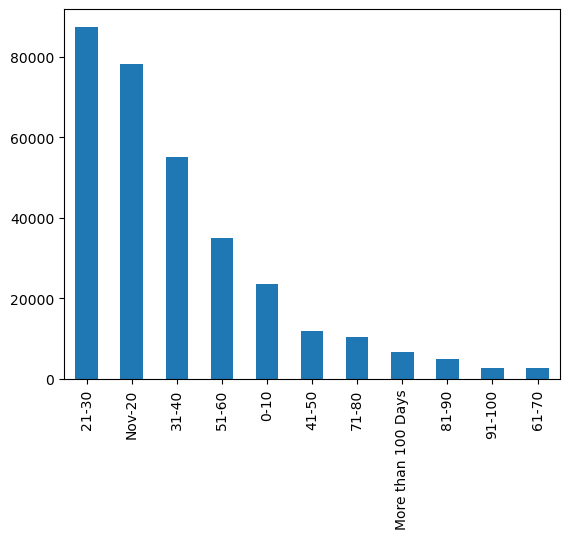

In [15]:
df['Stay'].value_counts().plot(kind = 'bar')

In [16]:
df['Stay'].replace({'More than 100 Days':'>100','Nov-20':'11-20'},inplace = True)

In [17]:
df['Age'].replace({'Nov-20':'11-20'},inplace = True)

<AxesSubplot:>

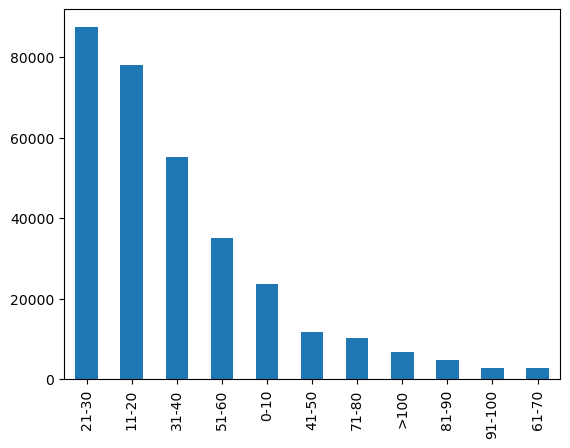

In [18]:
df['Stay'].value_counts().plot(kind = 'bar')

In [19]:
#Department, type of admission, #severity of illness, age against stay

In [20]:
init_analysis = df[['Department','Type of Admission','Severity of Illness','Age']].columns.to_list()

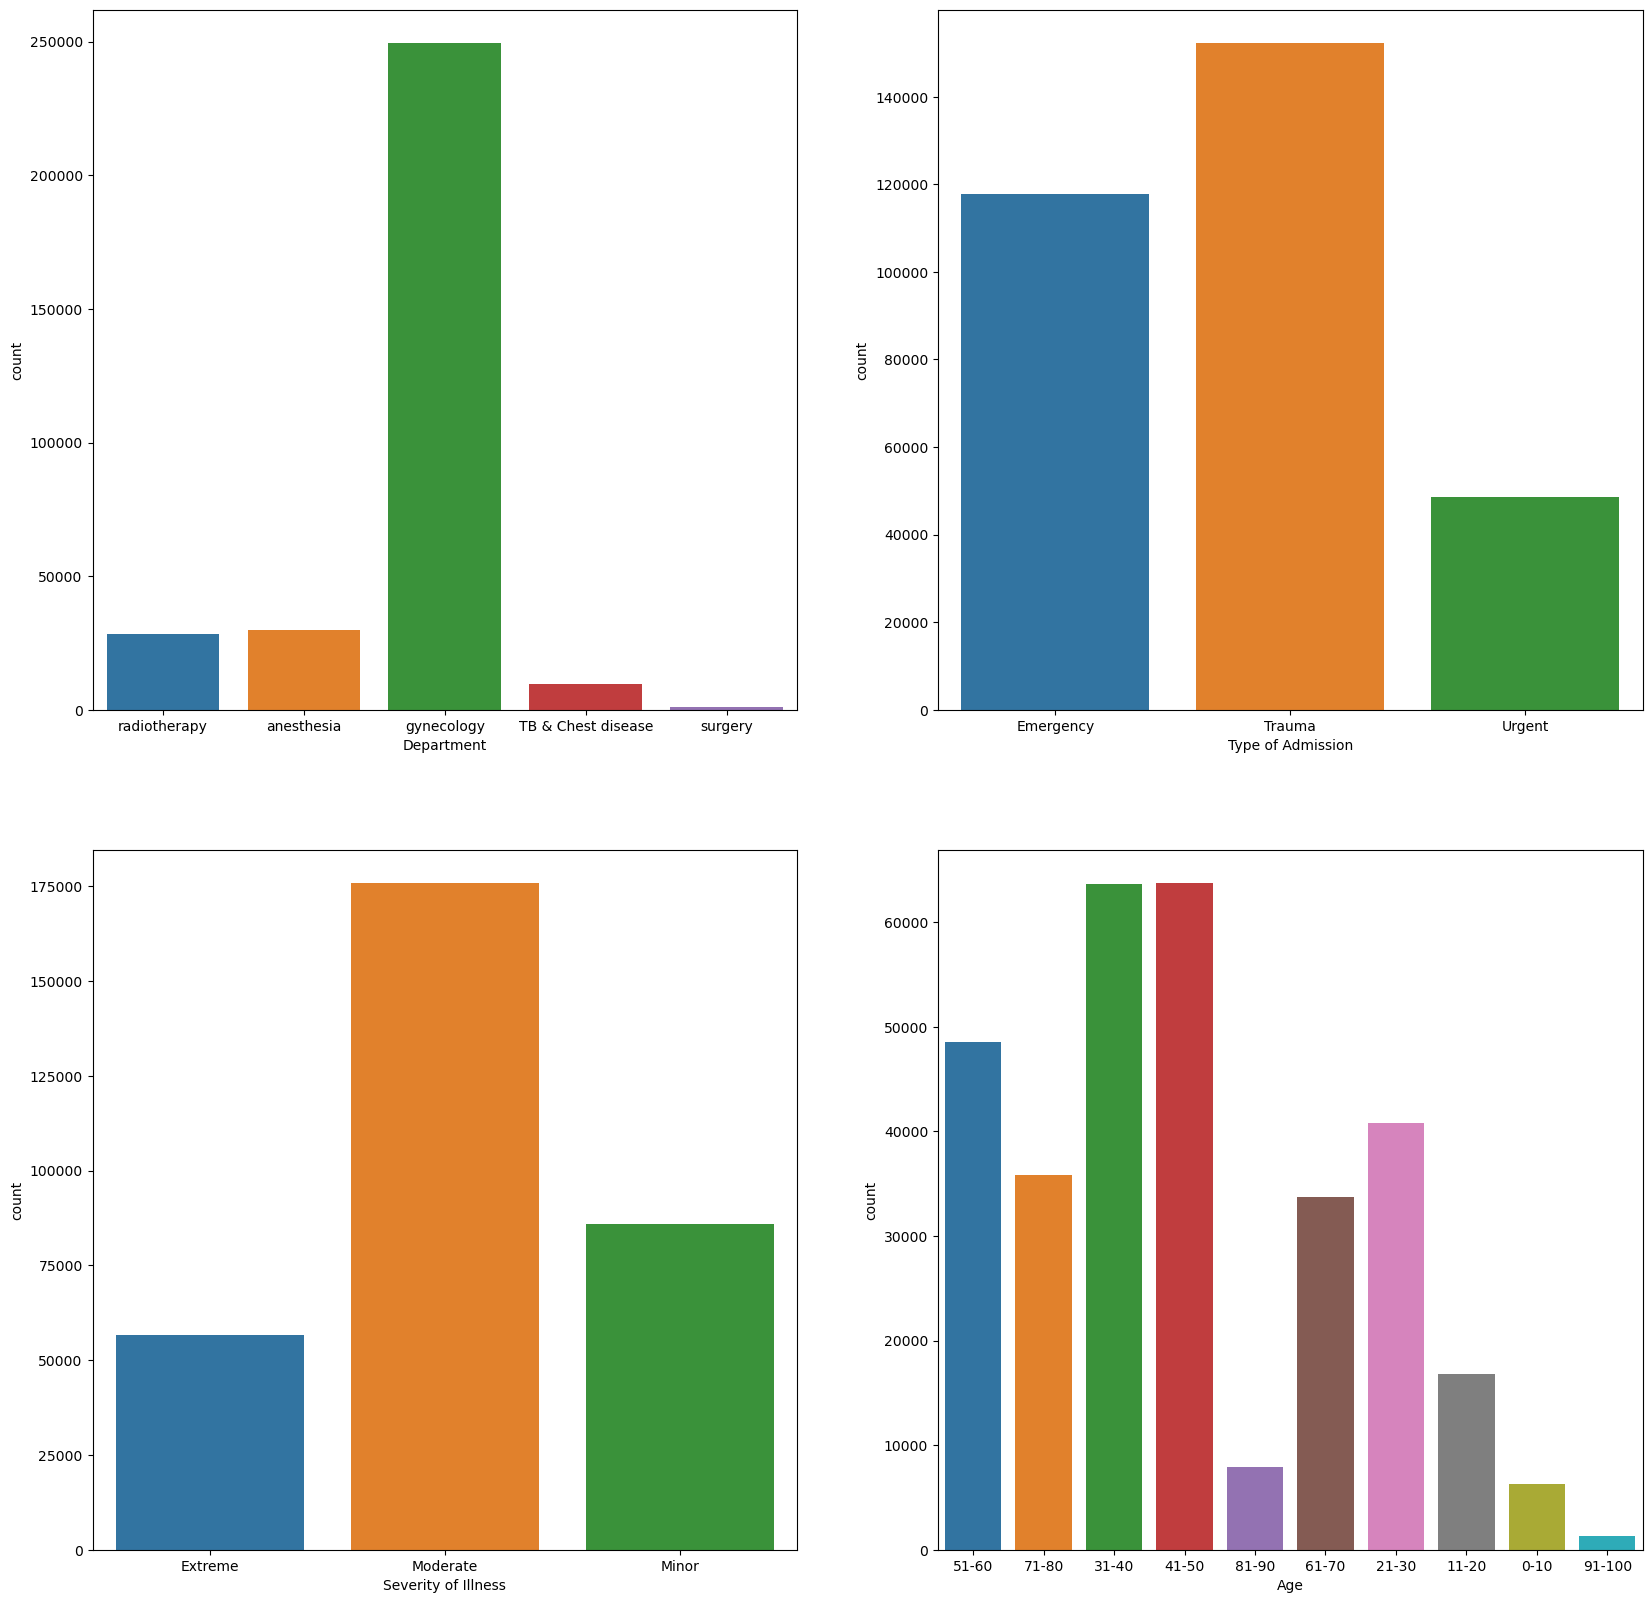

In [21]:
fig,ax = plt.subplots(2,2,figsize = (20,20))
for i,j in zip(init_analysis,ax.flatten()):
    sns.countplot(df[i],ax = j)
plt.show()

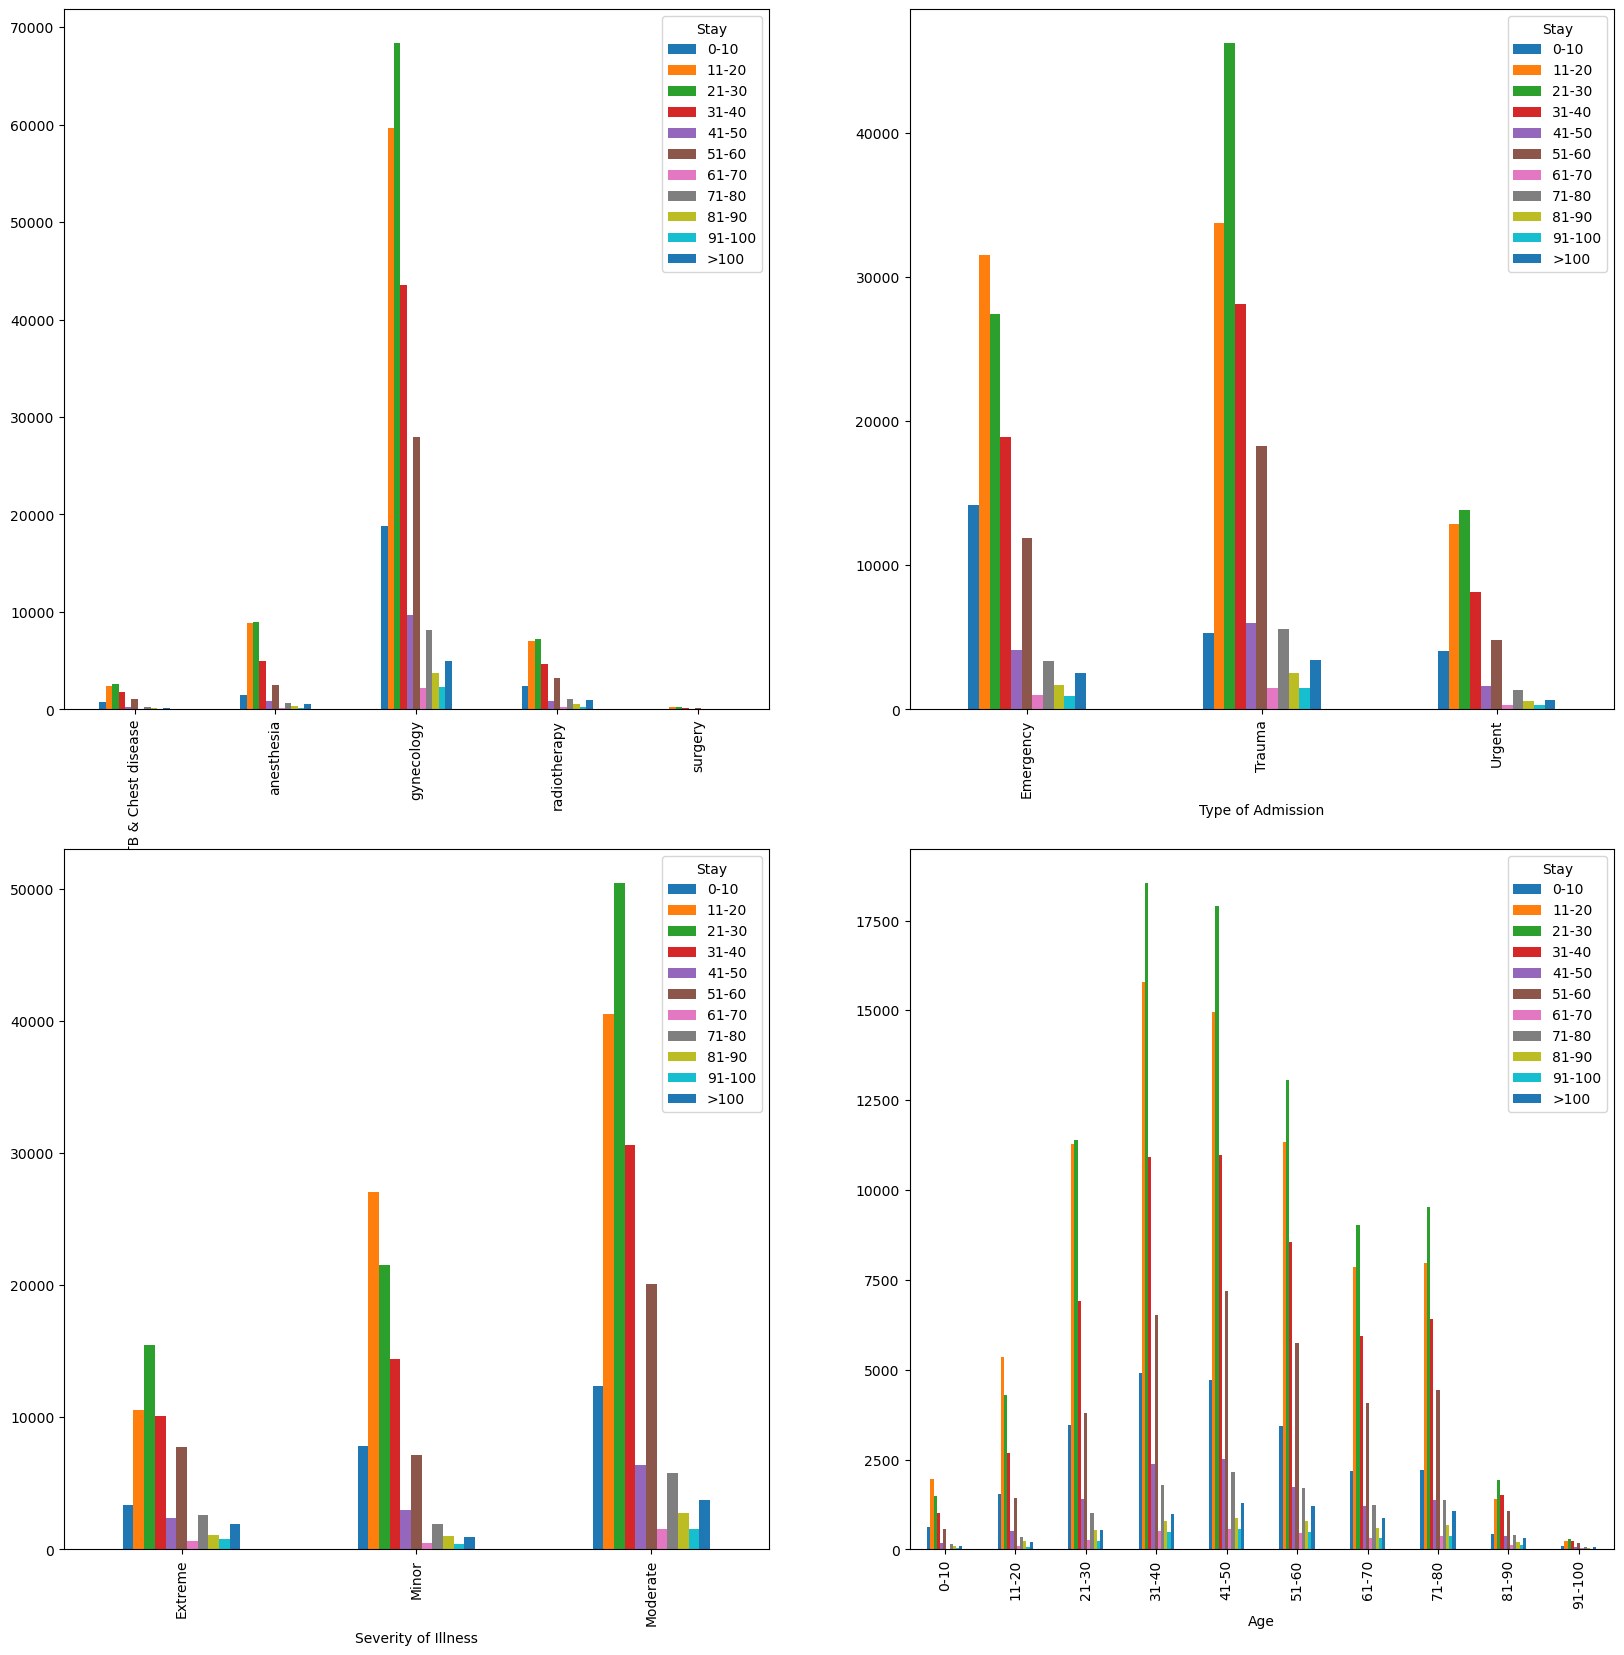

In [94]:
fig,ax = plt.subplots(2,2,figsize = (20,20))
for i,j in zip(init_analysis,ax.flatten()):
    pd.crosstab(df[i],df['Stay']).plot(kind = 'bar',ax = j)
plt.show()

In [24]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

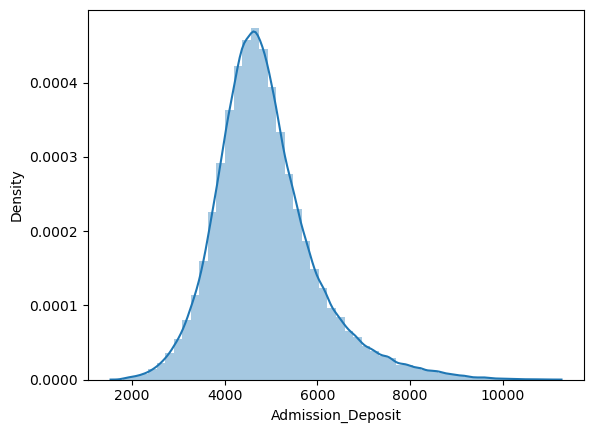

In [25]:
sns.distplot(df['Admission_Deposit'])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Stay'>

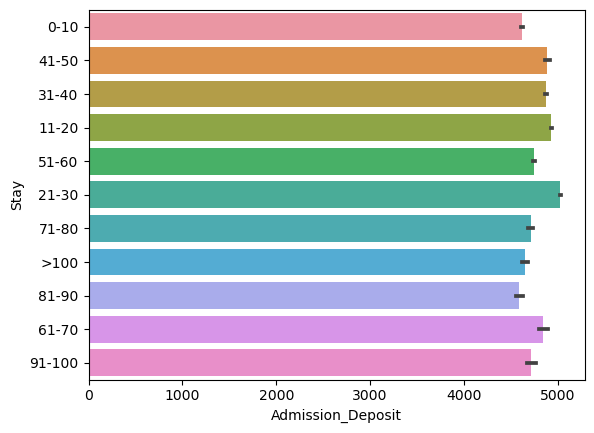

In [95]:
sns.barplot(df['Admission_Deposit'],df['Stay'])

In [27]:
len(df['City_Code_Hospital'].value_counts())

11

<AxesSubplot:>

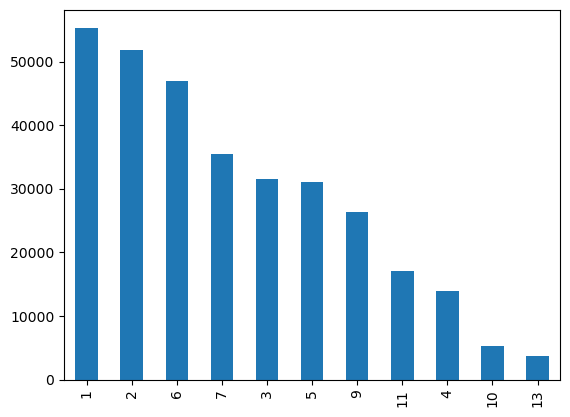

In [28]:
df['City_Code_Hospital'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Stay'>

<Figure size 2000x3000 with 0 Axes>

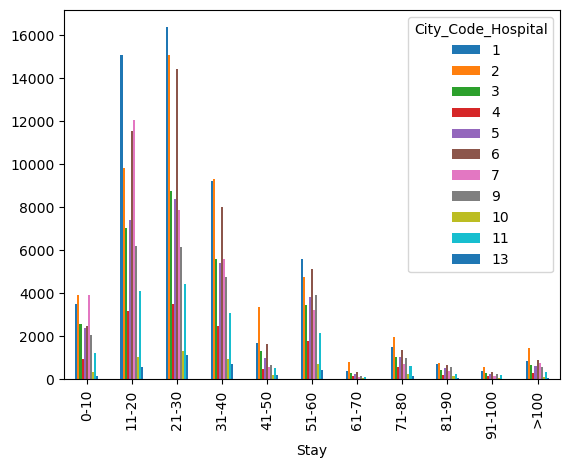

In [29]:
plt.figure(figsize = (20,30))
pd.crosstab(df['Stay'],df['City_Code_Hospital']).plot(kind = 'bar')

In [30]:
df['City_Code_Patient'].value_counts()

8.0     128543
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [70]:
df['City_Code_Patient']=df['City_Code_Patient'].astype('int')

In [71]:
pd.crosstab(df['City_Code_Patient'],df['Stay'])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,>100
City_Code_Patient,,,,,,,,,,,
1,1859,6544,7720,4514,733,3064,172,737,386,194,454
2,2446,10193,11883,6376,1130,4377,199,940,523,248,554
3,233,751,828,703,175,493,61,187,93,69,179
4,1432,3965,3986,2556,669,1639,126,433,215,123,236
5,1588,4583,4997,3608,816,2436,230,807,335,197,482
6,631,1735,1424,1027,210,548,51,181,72,49,77
7,1691,5840,6269,4233,808,2843,200,766,449,194,514
8,8618,29811,35934,22723,5116,14003,1218,4600,2041,1235,3244
9,1044,2905,3011,2060,504,1300,125,376,162,112,196


In [86]:
def city_code(x):
    if x >= 1 and x<=9:
        return "1-9"
    elif x>=10 and x<=18:
        return "10-18"
    elif x>=19 and x<=27:
        return "19-27"
    else:
        return "28-38"

In [74]:
df['City_Code_Patient_fe']=df['City_Code_Patient'].apply(city_code)

<AxesSubplot:>

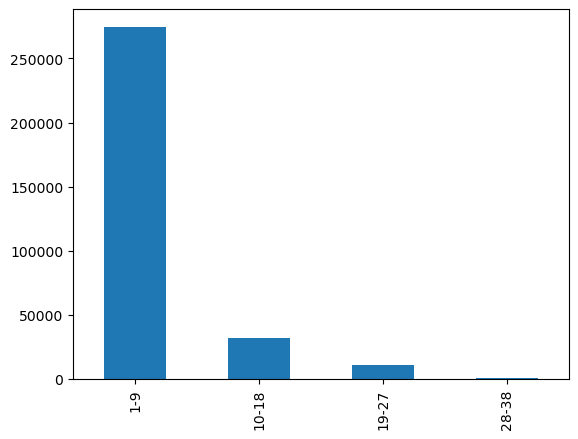

In [77]:
df['City_Code_Patient_fe'].value_counts().plot(kind = 'bar')

In [80]:
pd.crosstab(df['City_Code_Patient_fe'],df['Stay'])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,>100
City_Code_Patient_fe,,,,,,,,,,,
1-9,19542,66327,76052,47800,10161,30703,2382,9027,4276,2421,5936
10-18,2761,8336,8340,5297,1114,3311,275,917,430,282,576
19-27,1189,3189,2813,1893,410,913,78,278,119,54,158
28-38,112,287,286,169,58,91,9,32,13,8,13


<AxesSubplot:xlabel='City_Code_Patient_fe'>

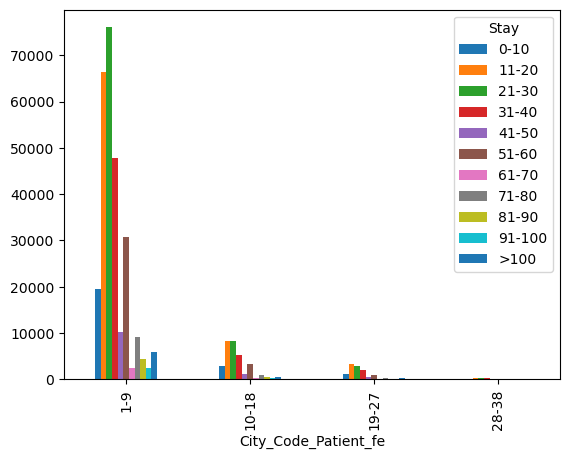

In [96]:
pd.crosstab(df['City_Code_Patient_fe'],df['Stay']).plot(kind = 'bar')

<AxesSubplot:>

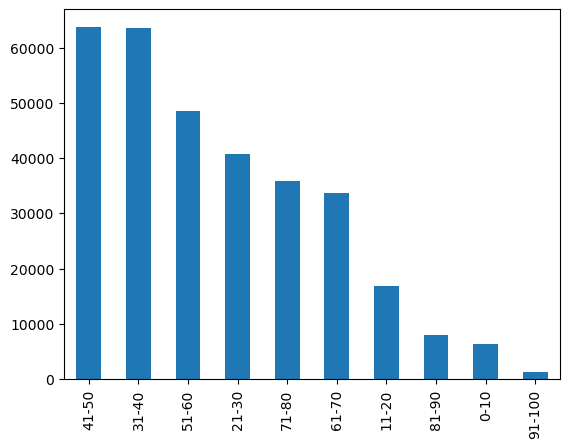

In [84]:
df['Age'].value_counts().plot(kind = 'bar')

In [87]:
def age(x):
    if x == '0-10' or x == '11-20' or x == '21-30':
        return '0-30'
    elif x == '31-40' or x == '41-50' or x == '51-60':
        return "31-60"
    elif x == '61-70' or x == '71-80' or x == '81-90' or x == '91-100':
        return "61-100"

In [90]:
df['Age_fe']=df['Age'].apply(age)

<AxesSubplot:>

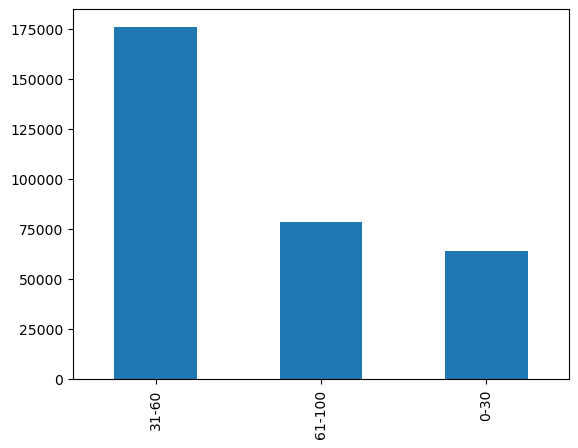

In [92]:
df['Age_fe'].value_counts().plot(kind ='bar')

<AxesSubplot:xlabel='Age_fe'>

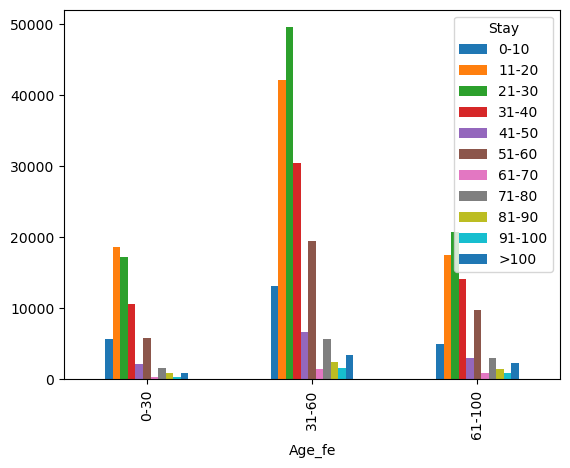

In [98]:
pd.crosstab(df['Age_fe'],df['Stay']).plot(kind = 'bar')

In [33]:
df_1 = df.copy()

In [34]:
cat = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type',
 'Ward_Facility_Code','Type of Admission','Severity of Illness','Age']

In [35]:
le = LabelEncoder()
for i in cat:
    df_1[i] = le.fit_transform(df_1[i])

In [36]:
df_1.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558,41-50


In [37]:
x_base = df_1.drop(['case_id','patientid','Stay'],axis = 1)
y_base = df_1['Stay']

In [38]:
xtrain_base,xtest_base,ytrain_base,ytest_base = train_test_split(x_base,y_base,train_size=0.70,random_state = 100)

In [39]:
dt_base = DecisionTreeClassifier()
model_base = dt_base.fit(xtrain_base,ytrain_base)
ypred_base = model_base.predict(xtest_base)

In [40]:
print(classification_report(ypred_base,ytest_base))

              precision    recall  f1-score   support

        0-10       0.19      0.19      0.19      7230
       11-20       0.34      0.34      0.34     23207
       21-30       0.38      0.39      0.38     25580
       31-40       0.24      0.24      0.24     16657
       41-50       0.06      0.06      0.06      3794
       51-60       0.30      0.30      0.30     10456
       61-70       0.04      0.03      0.03       907
       71-80       0.14      0.14      0.14      3178
       81-90       0.21      0.20      0.20      1538
      91-100       0.10      0.09      0.09       927
        >100       0.34      0.32      0.33      2058

    accuracy                           0.29     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.29      0.29     95532



In [41]:
x_sig = df_1[['Department','Type of Admission','Severity of Illness','Age']]
y_sig = df_1['Stay']

In [42]:
xtrain_sig,xtest_sig,ytrain_sig,ytest_sig = train_test_split(x_sig,y_sig,train_size=0.70,random_state = 100)

In [43]:
dt_sig = DecisionTreeClassifier()
model_sig = dt_sig.fit(xtrain_sig,ytrain_sig)
ypred_sig = model_sig.predict(xtest_sig)

In [44]:
print(classification_report(ypred_sig,ytest_sig))

              precision    recall  f1-score   support

        0-10       0.00      0.19      0.00        83
       11-20       0.57      0.29      0.39     45819
       21-30       0.56      0.30      0.39     48939
       31-40       0.01      0.18      0.01       611
       41-50       0.00      0.00      0.00         0
       51-60       0.00      0.22      0.00        64
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.00      0.00         4
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.33      0.00         3
        >100       0.00      0.44      0.00         9

    accuracy                           0.30     95532
   macro avg       0.10      0.18      0.07     95532
weighted avg       0.56      0.30      0.39     95532



In [45]:
rf_base = RandomForestClassifier()

In [46]:
x_rf = df_1.drop(['case_id','patientid','Stay'],axis = 1)
y_rf = df_1['Stay']

xtrain_rf,xtest_rf,ytrain_rf,ytest_rf = train_test_split(x_rf,y_rf,train_size=0.70,random_state = 100)

model_rf = rf_base.fit(xtrain_rf,ytrain_rf)
ypred_rf = model_rf.predict(xtest_rf)

print(classification_report(ypred_rf,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.18      0.29      0.22      4407
       11-20       0.44      0.39      0.42     26735
       21-30       0.53      0.41      0.46     34098
       31-40       0.26      0.33      0.29     13277
       41-50       0.02      0.07      0.03       934
       51-60       0.45      0.39      0.42     12262
       61-70       0.02      0.11      0.03       154
       71-80       0.09      0.26      0.14      1069
       81-90       0.18      0.37      0.25       746
      91-100       0.05      0.26      0.09       165
        >100       0.43      0.50      0.46      1685

    accuracy                           0.38     95532
   macro avg       0.24      0.31      0.26     95532
weighted avg       0.43      0.38      0.40     95532



In [47]:
x_sig_rf = df_1[['Department','Type of Admission','Severity of Illness','Age']]
y_sig_rf = df_1['Stay']

xtrain_sig_rf,xtest_sig_rf,ytrain_sig_rf,ytest_sig_rf = train_test_split(x_sig_rf,y_sig_rf,train_size=0.70,random_state = 100)

rf_sig = RandomForestClassifier()
model_sig_rf = rf_sig.fit(xtrain_sig_rf,ytrain_sig_rf)
ypred_sig_rf = model_sig_rf.predict(xtest_sig_rf)

print(classification_report(ypred_sig_rf,ytest_sig_rf))

              precision    recall  f1-score   support

        0-10       0.00      0.18      0.00        78
       11-20       0.56      0.29      0.39     45316
       21-30       0.57      0.30      0.39     49389
       31-40       0.01      0.18      0.01       637
       41-50       0.00      0.00      0.00         2
       51-60       0.00      0.21      0.00        94
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.00      0.00         4
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.33      0.00         3
        >100       0.00      0.44      0.00         9

    accuracy                           0.30     95532
   macro avg       0.10      0.18      0.07     95532
weighted avg       0.56      0.30      0.39     95532



In [48]:
dt_base.feature_importances_

array([0.0474983 , 0.0181487 , 0.02315233, 0.00892734, 0.07262566,
       0.04163651, 0.04815559, 0.01620357, 0.04078867, 0.09500599,
       0.02363562, 0.04338349, 0.08014514, 0.11706405, 0.32362906])

In [49]:
features = pd.DataFrame({'Columns':xtrain_base.columns,'Importance':dt_base.feature_importances_})

In [50]:
features.sort_values(by = 'Importance',ascending = False)

,Columns,Importance
14,Admission_Deposit,0.323629
13,Age,0.117064
9,City_Code_Patient,0.095006
12,Visitors with Patient,0.080145
4,Available Extra Rooms in Hospital,0.072626
6,Ward_Type,0.048156
0,Hospital_code,0.047498
11,Severity of Illness,0.043383
5,Department,0.041637
8,Bed Grade,0.040789


In [51]:
important = features[features['Importance']>=0.07]['Columns'].to_list()

In [52]:
x_imp = df_1[important]
y_imp = df_1['Stay']

In [53]:
xtrain_imp,xtest_imp,ytrain_imp,ytest_imp = train_test_split(x_imp,y_imp,train_size=0.70,random_state = 100)

dt_imp = DecisionTreeClassifier()
model_imp = dt_imp.fit(xtrain_imp,ytrain_imp)
ypred_imp = model_imp.predict(xtest_imp)

print(classification_report(ypred_imp,ytest_imp))

              precision    recall  f1-score   support

        0-10       0.14      0.12      0.13      7790
       11-20       0.31      0.30      0.30     24511
       21-30       0.34      0.35      0.34     25774
       31-40       0.20      0.21      0.20     15934
       41-50       0.05      0.05      0.05      3274
       51-60       0.24      0.25      0.24     10142
       61-70       0.01      0.01      0.01       759
       71-80       0.09      0.09      0.09      3046
       81-90       0.13      0.14      0.14      1440
      91-100       0.03      0.03      0.03       866
        >100       0.25      0.25      0.25      1996

    accuracy                           0.25     95532
   macro avg       0.16      0.16      0.16     95532
weighted avg       0.25      0.25      0.25     95532



In [54]:
x_imp_rf = df_1[important]
y_imp_rf = df_1['Stay']

xtrain_imp_rf,xtest_imp_rf,ytrain_imp_rf,ytest_imp_rf = train_test_split(x_imp_rf,y_imp_rf,train_size=0.70,random_state = 100)

rf_imp = RandomForestClassifier()
model_rf_imp = rf_imp.fit(xtrain_imp_rf,ytrain_imp_rf)
ypred_rf_imp = model_rf_imp.predict(xtest_imp_rf)

print(classification_report(ypred_rf_imp,ytest_imp_rf))

              precision    recall  f1-score   support

        0-10       0.13      0.13      0.13      6744
       11-20       0.31      0.30      0.30     24246
       21-30       0.36      0.35      0.36     27077
       31-40       0.20      0.21      0.20     16261
       41-50       0.05      0.06      0.05      2965
       51-60       0.27      0.26      0.26     10932
       61-70       0.01      0.02      0.02       627
       71-80       0.09      0.09      0.09      2743
       81-90       0.13      0.15      0.14      1222
      91-100       0.03      0.04      0.03       686
        >100       0.31      0.31      0.31      2029

    accuracy                           0.26     95532
   macro avg       0.17      0.17      0.17     95532
weighted avg       0.27      0.26      0.27     95532



In [55]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
df['Stay'].value_counts()

21-30     87491
11-20     78139
31-40     55159
51-60     35018
0-10      23604
41-50     11743
71-80     10254
>100       6683
81-90      4838
91-100     2765
61-70      2744
Name: Stay, dtype: int64

In [57]:
sampling = {'41-50':18743,'71-80':17254,'91-100':12765,'61-70':12644,'>100':9993,'81-90':8893}
oversampler = RandomOverSampler(sampling_strategy= sampling)
x_resampled, y_resampled = oversampler.fit_resample(xtrain_base,ytrain_base)

<AxesSubplot:>

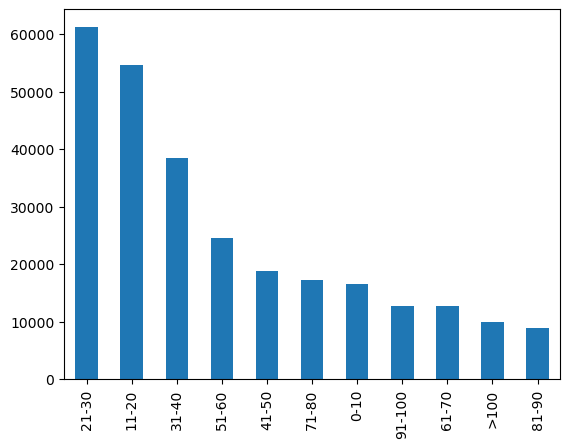

In [58]:
y_resampled.value_counts().plot(kind = 'bar')

In [59]:
model_bal = dt_base.fit(x_resampled, y_resampled)
ypred_bal = model_bal.predict(xtest_base)

print(classification_report(ypred_bal,ytest_base))

              precision    recall  f1-score   support

        0-10       0.19      0.19      0.19      7102
       11-20       0.34      0.35      0.34     22779
       21-30       0.38      0.39      0.38     25644
       31-40       0.24      0.24      0.24     16642
       41-50       0.07      0.06      0.06      3975
       51-60       0.30      0.30      0.30     10446
       61-70       0.03      0.03      0.03      1017
       71-80       0.16      0.15      0.15      3297
       81-90       0.21      0.20      0.21      1576
      91-100       0.11      0.09      0.10      1054
        >100       0.31      0.31      0.31      2000

    accuracy                           0.29     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.29      0.29     95532



In [60]:
model_rf_bal = rf_base.fit(x_resampled, y_resampled)
ypred_rf_bal = model_rf_bal.predict(xtest_rf)

print(classification_report(ypred_rf_bal,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.18      0.29      0.22      4328
       11-20       0.43      0.39      0.41     26264
       21-30       0.52      0.41      0.46     33434
       31-40       0.26      0.33      0.29     12852
       41-50       0.04      0.08      0.05      1687
       51-60       0.41      0.39      0.40     11184
       61-70       0.03      0.07      0.05       380
       71-80       0.13      0.22      0.17      1906
       81-90       0.27      0.32      0.29      1216
      91-100       0.08      0.17      0.11       406
        >100       0.45      0.47      0.46      1875

    accuracy                           0.37     95532
   macro avg       0.26      0.29      0.26     95532
weighted avg       0.41      0.37      0.39     95532



In [61]:
oversampler = RandomOverSampler(sampling_strategy= 'auto')
x_resampled_1, y_resampled_1 = oversampler.fit_resample(xtrain_base,ytrain_base)

In [62]:
y_resampled_1.value_counts()

11-20     61232
0-10      61232
71-80     61232
21-30     61232
51-60     61232
31-40     61232
61-70     61232
>100      61232
41-50     61232
81-90     61232
91-100    61232
Name: Stay, dtype: int64

In [63]:
model_bal_1 = dt_base.fit(x_resampled_1, y_resampled_1)
ypred_bal_1 = model_bal_1.predict(xtest_base)

print(classification_report(ypred_bal_1,ytest_base))

              precision    recall  f1-score   support

        0-10       0.19      0.19      0.19      7322
       11-20       0.33      0.35      0.34     22451
       21-30       0.37      0.39      0.38     25311
       31-40       0.24      0.24      0.24     16446
       41-50       0.07      0.06      0.06      4020
       51-60       0.31      0.30      0.31     10869
       61-70       0.04      0.03      0.03       974
       71-80       0.15      0.13      0.14      3394
       81-90       0.22      0.21      0.21      1593
      91-100       0.09      0.07      0.08       995
        >100       0.34      0.31      0.32      2157

    accuracy                           0.29     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.29      0.29     95532



In [64]:
model_rf_bal_1 = rf_base.fit(x_resampled_1, y_resampled_1)
ypred_rf_bal_1 = model_rf_bal_1.predict(xtest_rf)

print(classification_report(ypred_rf_bal_1,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.26      0.25      0.26      7184
       11-20       0.41      0.39      0.40     24353
       21-30       0.48      0.42      0.44     29871
       31-40       0.25      0.31      0.28     13408
       41-50       0.04      0.07      0.06      2083
       51-60       0.46      0.37      0.41     13153
       61-70       0.03      0.09      0.05       313
       71-80       0.13      0.21      0.16      1828
       81-90       0.25      0.33      0.28      1113
      91-100       0.08      0.22      0.12       303
        >100       0.45      0.46      0.46      1923

    accuracy                           0.36     95532
   macro avg       0.26      0.29      0.26     95532
weighted avg       0.39      0.36      0.37     95532



In [65]:
x_sig_1 = df_1[['Department','Type of Admission','Severity of Illness','Age','City_Code_Patient','City_Code_Hospital']]
y_sig_1 = df_1['Stay']

xtrain_sig_1,xtest_sig_1,ytrain_sig_1,ytest_sig_1 = train_test_split(x_sig_1,y_sig_1,train_size=0.70,random_state = 100)

dt_sig_1 = DecisionTreeClassifier()
model_sig_1 = dt_sig_1.fit(xtrain_sig_1,ytrain_sig_1)
ypred_sig_1 = model_sig_1.predict(xtest_sig_1)

print(classification_report(ypred_sig_1,ytest_sig_1))

              precision    recall  f1-score   support

        0-10       0.08      0.15      0.10      3672
       11-20       0.46      0.31      0.37     34331
       21-30       0.53      0.31      0.39     45831
       31-40       0.09      0.19      0.12      7312
       41-50       0.01      0.08      0.02       501
       51-60       0.05      0.17      0.07      2741
       61-70       0.00      0.04      0.01        69
       71-80       0.01      0.10      0.02       418
       81-90       0.01      0.11      0.02       177
      91-100       0.01      0.06      0.01        86
        >100       0.04      0.22      0.07       394

    accuracy                           0.29     95532
   macro avg       0.12      0.16      0.11     95532
weighted avg       0.43      0.29      0.34     95532



In [66]:
x_sig_1_rf = df_1[['Department','Type of Admission','Severity of Illness','Age','City_Code_Patient','City_Code_Hospital']]
y_sig_1_rf = df_1['Stay']

xtrain_sig_1_rf,xtest_sig_1_rf,ytrain_sig_1_rf,ytest_sig_1_rf = train_test_split(x_sig_1_rf,y_sig_1_rf,train_size=0.70,random_state = 100)

rf_sig_1 = RandomForestClassifier()
model_sig_1_rf = rf_sig_1.fit(xtrain_sig_1_rf,ytrain_sig_1_rf)
ypred_sig_1_rf = model_sig_1_rf.predict(xtest_sig_1_rf)

print(classification_report(ypred_sig_1_rf,ytest_sig_1_rf))

              precision    recall  f1-score   support

        0-10       0.05      0.15      0.07      2290
       11-20       0.43      0.32      0.36     31556
       21-30       0.55      0.31      0.39     46803
       31-40       0.10      0.19      0.13      8811
       41-50       0.02      0.09      0.03       700
       51-60       0.06      0.17      0.09      3816
       61-70       0.01      0.09      0.02       101
       71-80       0.02      0.11      0.03       589
       81-90       0.02      0.11      0.03       218
      91-100       0.01      0.06      0.01       123
        >100       0.06      0.21      0.09       525

    accuracy                           0.29     95532
   macro avg       0.12      0.16      0.12     95532
weighted avg       0.42      0.29      0.33     95532



In [99]:
x_new = df[['Department','Type of Admission','Severity of Illness','Age_fe','City_Code_Patient_fe']]
y_new = df['Stay']

In [103]:
x_new = pd.get_dummies(x_new)

In [104]:
xtrain_new,xtest_new,ytrain_new,ytest_new = train_test_split(x_new,y_new,train_size=0.70,random_state = 100)

In [105]:
dt_new = DecisionTreeClassifier()
model_new = dt_new.fit(xtrain_new,ytrain_new)
ypred_new = model_new.predict(xtest_new)

print(classification_report(ypred_new,ytest_new))

              precision    recall  f1-score   support

        0-10       0.00      0.15      0.00        73
       11-20       0.57      0.29      0.39     45718
       21-30       0.56      0.30      0.39     49551
       31-40       0.00      0.16      0.00        83
       41-50       0.00      0.00      0.00         9
       51-60       0.00      0.16      0.00        91
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.50      0.00         2
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.00      0.00         0
        >100       0.00      0.20      0.00         5

    accuracy                           0.30     95532
   macro avg       0.10      0.16      0.07     95532
weighted avg       0.57      0.30      0.39     95532



In [107]:
rf_new = RandomForestClassifier()
model_new_rf = rf_new.fit(xtrain_new,ytrain_new)
ypred_new_rf = model_new_rf.predict(xtest_new)

print(classification_report(ypred_new_rf,ytest_new))

              precision    recall  f1-score   support

        0-10       0.00      0.15      0.00        46
       11-20       0.57      0.29      0.39     45450
       21-30       0.57      0.30      0.39     49809
       31-40       0.00      0.17      0.00        89
       41-50       0.00      0.00      0.00        14
       51-60       0.00      0.16      0.00       111
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.12      0.00         8
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.00      0.00         0
        >100       0.00      0.20      0.00         5

    accuracy                           0.30     95532
   macro avg       0.10      0.13      0.07     95532
weighted avg       0.56      0.30      0.39     95532



In [114]:
x_base_new = df.drop(['Age','City_Code_Patient','Stay','case_id','patientid','Admission_Deposit'],axis = 1)

In [118]:
y_base_new = df['Stay']

In [116]:
le = LabelEncoder()
for i in x_base_new.columns:
    x_base_new[i] = le.fit_transform(x_base_new[i])

In [120]:
xtrain_base_new,xtest_base_new,ytrain_base_new,ytest_base_new = train_test_split(x_base_new,y_base_new,train_size = 0.70,random_state = 100)

In [122]:
dt_base_new = DecisionTreeClassifier()
model_base_new = dt_base_new.fit(xtrain_base_new,ytrain_base_new)
ypred_base_new = model_base_new.predict(xtest_base_new)

print(classification_report(ypred_base_new,ytest_base_new))

              precision    recall  f1-score   support

        0-10       0.18      0.18      0.18      7228
       11-20       0.42      0.35      0.38     28153
       21-30       0.46      0.40      0.43     30331
       31-40       0.23      0.30      0.26     12850
       41-50       0.03      0.06      0.04      1729
       51-60       0.33      0.37      0.35      9338
       61-70       0.03      0.06      0.04       385
       71-80       0.13      0.18      0.15      2101
       81-90       0.21      0.26      0.23      1157
      91-100       0.09      0.13      0.11       553
        >100       0.35      0.41      0.38      1707

    accuracy                           0.34     95532
   macro avg       0.22      0.25      0.23     95532
weighted avg       0.36      0.34      0.35     95532



In [123]:
rf_base_new = RandomForestClassifier()
model_base_new_rf = rf_base_new.fit(xtrain_base_new,ytrain_base_new)
ypred_base_new_rf = model_base_new_rf.predict(xtest_base_new)

print(classification_report(ypred_base_new_rf,ytest_base_new))

              precision    recall  f1-score   support

        0-10       0.13      0.21      0.16      4322
       11-20       0.41      0.37      0.39     26032
       21-30       0.52      0.40      0.45     33789
       31-40       0.24      0.30      0.27     13367
       41-50       0.03      0.08      0.04      1376
       51-60       0.40      0.37      0.38     11436
       61-70       0.03      0.08      0.04       281
       71-80       0.11      0.20      0.15      1726
       81-90       0.21      0.29      0.24      1052
      91-100       0.08      0.18      0.11       367
        >100       0.40      0.44      0.42      1784

    accuracy                           0.36     95532
   macro avg       0.23      0.27      0.24     95532
weighted avg       0.40      0.36      0.37     95532

